In [1]:
import math
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('daily_data.csv')

In [3]:
df=df.set_index('Date')

In [4]:
df.shape

(1400, 1)

In [5]:
df.dtypes

Consumption (Kwh)    float64
dtype: object

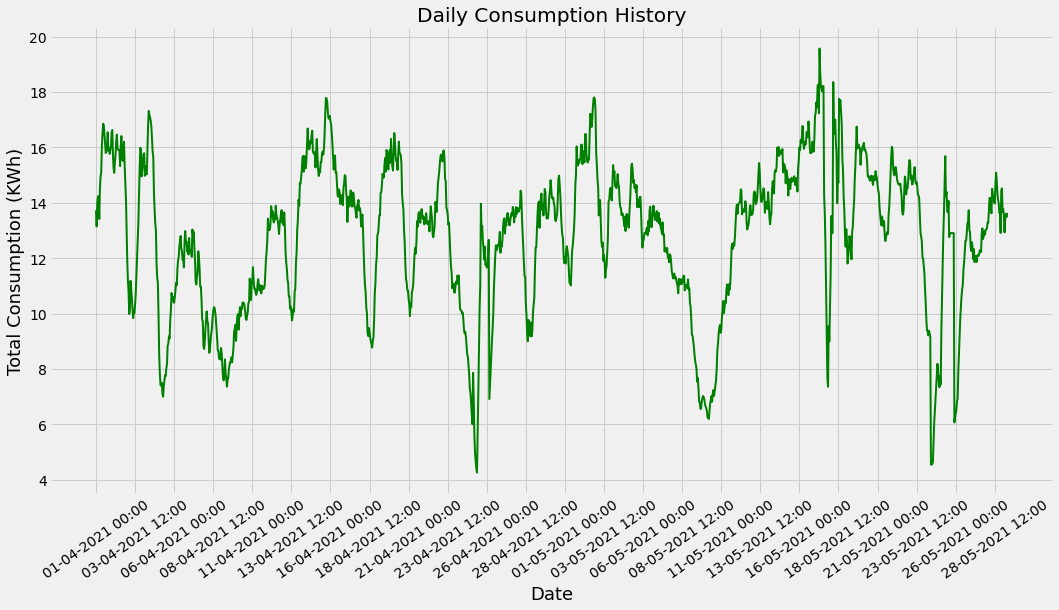

In [6]:
plt.figure(figsize=(16,8))
plt.title("Daily Consumption History")
plt.plot(df['Consumption (Kwh)'],linewidth=2,color='green')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Consumption (KWh)',fontsize=18)
plt.xticks(rotation=35)
plt.xticks(np.arange(0,1400,60))
plt.show()

In [7]:
data=df.filter(['Consumption (Kwh)'])
dataset=data.values

# splitting data into train and test
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1120

In [8]:
#Normalizing the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

scaled_data

array([[0.61837958],
       [0.58041952],
       [0.63738842],
       ...,
       [0.61041346],
       [0.6024435 ],
       [0.61228784]])

In [9]:
train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

# considering 90 days as timestep for prediction
for i in range(90,len(train_data)):
    x_train.append(train_data[i-90:i,0])
    y_train.append(train_data[i,0])
    if i<=90:
        print(x_train)
        print(y_train)
        print()

[array([0.61837958, 0.58041952, 0.63738842, 0.64954501, 0.65245645,
       0.59794959, 0.66882272, 0.6979947 , 0.70834605, 0.76932873,
       0.79993339, 0.82272556, 0.8177669 , 0.79746366, 0.7768954 ,
       0.75353093, 0.7581439 , 0.77183303, 0.80239159, 0.75850495,
       0.76632127, 0.75172568, 0.76095931, 0.76807275, 0.80123163,
       0.8077766 , 0.75062717, 0.71715717, 0.70698251, 0.73267843,
       0.75041976, 0.77980299, 0.79701427, 0.76491933, 0.76161612,
       0.76054065, 0.76054065, 0.72269198, 0.77084975, 0.79360735,
       0.75446428, 0.73505598, 0.76010278, 0.78000656, 0.72288018,
       0.68155161, 0.64447112, 0.56738719, 0.49826554, 0.45276186,
       0.42673945, 0.37403016, 0.38633655, 0.45227022, 0.43418705,
       0.41156772, 0.39083046, 0.36435482, 0.37635393, 0.37596984,
       0.39635758, 0.4217347 , 0.46238343, 0.50516388, 0.53912552,
       0.58724872, 0.65443838, 0.71644276, 0.76596407, 0.76111679,
       0.69846713, 0.71318948, 0.73061201, 0.7512955 , 0.7530

In [10]:
x_train,y_train=np.array(x_train),np.array(y_train)


In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1030, 90, 1)

In [12]:
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1))) 
model.add(LSTM(60))
model.add(Dropout(0.2))
tf.keras.layers.Dense(10, activation="relu")
model.add(Dense(1))
tf.keras.layers.Lambda(lambda x: x * 400)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [13]:
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [15]:
history=model.fit(x_train,y_train,batch_size=200,epochs=150,verbose=1,callbacks=[lr_schedule])

Epoch 1/150
6/6 [==============================] - 1s 192ms/step - loss: 0.1495 - mae: 0.5208
Epoch 2/150
6/6 [==============================] - 1s 118ms/step - loss: 0.1493 - mae: 0.5203
Epoch 3/150
6/6 [==============================] - 1s 114ms/step - loss: 0.1488 - mae: 0.5198
Epoch 4/150
6/6 [==============================] - 1s 246ms/step - loss: 0.1491 - mae: 0.5203
Epoch 5/150
6/6 [==============================] - 1s 239ms/step - loss: 0.1489 - mae: 0.5200
Epoch 6/150
6/6 [==============================] - 1s 134ms/step - loss: 0.1489 - mae: 0.5200
Epoch 7/150
6/6 [==============================] - 1s 247ms/step - loss: 0.1494 - mae: 0.5206
Epoch 8/150
6/6 [==============================] - 1s 220ms/step - loss: 0.1492 - mae: 0.5200
Epoch 9/150
6/6 [==============================] - 1s 110ms/step - loss: 0.1486 - mae: 0.5196
Epoch 10/150
6/6 [==============================] - 1s 207ms/step - loss: 0.1496 - mae: 0.5212
Epoch 11/150
6/6 [==============================] - 1s 224m

6/6 [==============================] - 1s 226ms/step - loss: 0.0741 - mae: 0.3522
Epoch 88/150
6/6 [==============================] - 1s 233ms/step - loss: 0.0685 - mae: 0.3359
Epoch 89/150
6/6 [==============================] - 1s 230ms/step - loss: 0.0618 - mae: 0.3175
Epoch 90/150
6/6 [==============================] - 1s 224ms/step - loss: 0.0556 - mae: 0.2992
Epoch 91/150
6/6 [==============================] - 1s 225ms/step - loss: 0.0489 - mae: 0.2782
Epoch 92/150
6/6 [==============================] - 1s 223ms/step - loss: 0.0435 - mae: 0.2607
Epoch 93/150
6/6 [==============================] - 1s 228ms/step - loss: 0.0379 - mae: 0.2413
Epoch 94/150
6/6 [==============================] - 1s 227ms/step - loss: 0.0328 - mae: 0.2222
Epoch 95/150
6/6 [==============================] - 1s 218ms/step - loss: 0.0279 - mae: 0.2034
Epoch 96/150
6/6 [==============================] - 1s 222ms/step - loss: 0.0235 - mae: 0.1863
Epoch 97/150
6/6 [==============================] - 1s 224ms/st

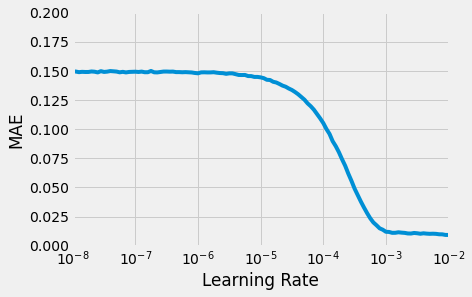

In [16]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-2, 0, 0.2])
plt.xlabel('Learning Rate')
plt.ylabel('MAE')

plt.tight_layout
plt.savefig('figure.png', bbox_inches="tight")

In [17]:
optimizer = tf.keras.optimizers.SGD(lr=9e-3, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


history = model.fit(x_train,y_train,batch_size=200,epochs=100,verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 224ms/step - loss: 0.0031 - mae: 0.0584
Epoch 2/100
6/6 [==============================] - 1s 232ms/step - loss: 0.0029 - mae: 0.0572
Epoch 3/100
6/6 [==============================] - 1s 229ms/step - loss: 0.0029 - mae: 0.0573
Epoch 4/100
6/6 [==============================] - 1s 228ms/step - loss: 0.0029 - mae: 0.0571
Epoch 5/100
6/6 [==============================] - 1s 238ms/step - loss: 0.0030 - mae: 0.0586
Epoch 6/100
6/6 [==============================] - 1s 221ms/step - loss: 0.0029 - mae: 0.0573
Epoch 7/100
6/6 [==============================] - 1s 218ms/step - loss: 0.0029 - mae: 0.0572
Epoch 8/100
6/6 [==============================] - 1s 226ms/step - loss: 0.0029 - mae: 0.0576
Epoch 9/100
6/6 [==============================] - 1s 218ms/step - loss: 0.0029 - mae: 0.0578
Epoch 10/100
6/6 [==============================] - 2s 250ms/step - loss: 0.0030 - mae: 0.0577
Epoch 11/100
6/6 [==============================] - 2s 253m

6/6 [==============================] - 2s 266ms/step - loss: 0.0027 - mae: 0.0543
Epoch 88/100
6/6 [==============================] - 2s 259ms/step - loss: 0.0026 - mae: 0.0531
Epoch 89/100
6/6 [==============================] - 1s 246ms/step - loss: 0.0026 - mae: 0.0534
Epoch 90/100
6/6 [==============================] - 1s 234ms/step - loss: 0.0025 - mae: 0.0519
Epoch 91/100
6/6 [==============================] - 1s 239ms/step - loss: 0.0024 - mae: 0.0521
Epoch 92/100
6/6 [==============================] - 1s 227ms/step - loss: 0.0026 - mae: 0.0533
Epoch 93/100
6/6 [==============================] - 2s 263ms/step - loss: 0.0026 - mae: 0.0528
Epoch 94/100
6/6 [==============================] - 1s 236ms/step - loss: 0.0026 - mae: 0.0528
Epoch 95/100
6/6 [==============================] - 1s 233ms/step - loss: 0.0026 - mae: 0.0529
Epoch 96/100
6/6 [==============================] - 1s 235ms/step - loss: 0.0025 - mae: 0.0524
Epoch 97/100
6/6 [==============================] - 1s 234ms/st

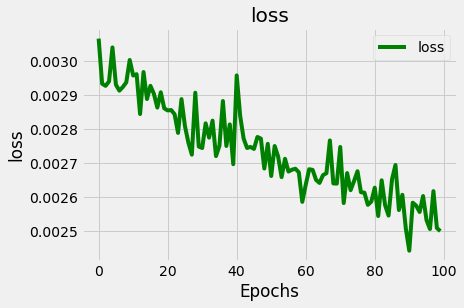

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot training and validation loss per epoch

loss=history.history['loss']

epochs=range(len(loss))

plt.plot(epochs, loss, 'g')
plt.title('loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss"])
# plt.axis([0, 100, 0, 0.015])
plt.figure()


plt.savefig('loss vs epoch.png', bbox_inches="tight")

In [20]:
test_data=scaled_data[training_data_len-90:,:]
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(90,len(test_data)):
    x_test.append(test_data[i-90:i,0])
    

In [21]:
x_test=np.array(x_test)

In [22]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
predictions=model.predict(x_test)

predictions= scaler.inverse_transform(predictions)

In [24]:
predictions.shape

(280, 1)

In [25]:
rmse= np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

1.738712860988598

In [26]:
import warnings
warnings.filterwarnings("ignore")

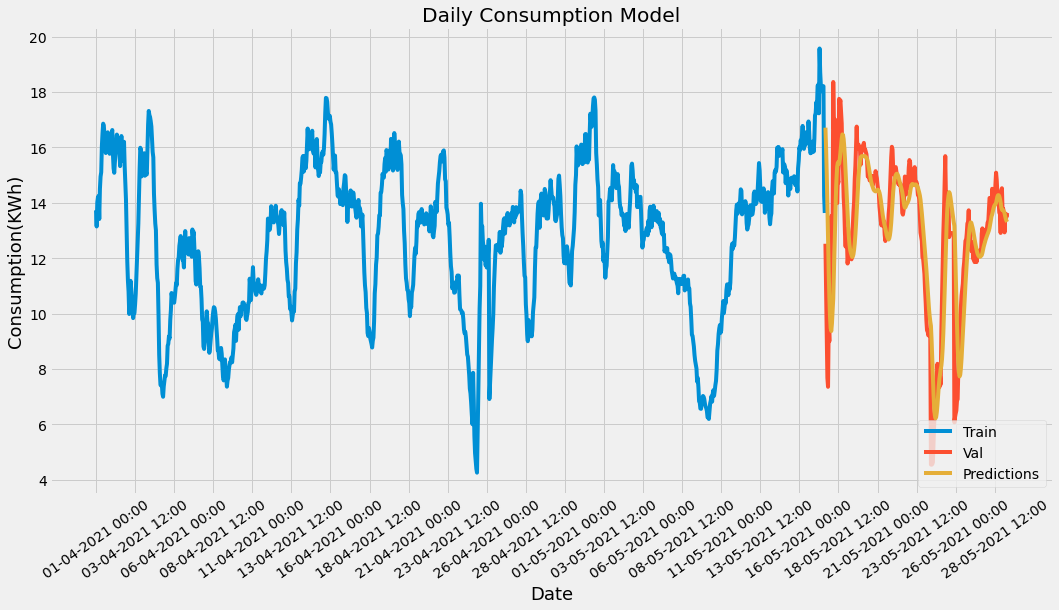

In [27]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title("Daily Consumption Model")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Consumption(KWh)',fontsize=18)
plt.plot(train['Consumption (Kwh)'])
plt.plot(valid[['Consumption (Kwh)','Predictions']])
plt.legend(["Train","Val","Predictions"],loc='lower right')
plt.xticks(rotation=35)
plt.xticks(np.arange(0,1400,60))
plt.show()

In [28]:
valid

,Consumption (Kwh),Predictions
Date,,
17-05-2021 16:00,12.521857,16.713409
17-05-2021 17:00,11.006000,15.971646
17-05-2021 18:00,9.258857,15.058594
17-05-2021 19:00,7.681143,13.973721
17-05-2021 20:00,7.357071,12.749234
...,...,...
29-05-2021 03:00,12.932706,13.627461
29-05-2021 04:00,13.406882,13.510654
29-05-2021 05:00,13.605824,13.414325


In [29]:
#predict

last_90_days= data[-90:].values

last_90_days_scaled = scaler.transform(last_90_days)

X_test=[]
X_test.append(last_90_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_consumption=model.predict(X_test)

pred_consumption= scaler.inverse_transform(pred_consumption)

print(float(pred_consumption))

13.292623519897461


In [30]:
def evaluate(pre,test_labels):
    errors=abs(pre-test_labels)
    mape=100*np.mean(errors/test_labels)
    accuracy= 100-mape
    print("Accuracy: {:0.2f}%".format(accuracy))

In [31]:
evaluate(predictions,y_test)

Accuracy: 89.32%


In [32]:
model.save("model_weights.h5")